Data Question 1: An Exploration of UN data

Markdown Link https://www.markdownguide.org/cheat-sheet/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

### 6. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 10 rows.

### Look at the last 5 rows. Do you see a problem?
The problem is that the dataset contains some notes, which we may not want to analyze. 

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN
5,Afghanistan,2012,1772.764974,NaN
6,Afghanistan,2011,1626.764793,NaN
7,Afghanistan,2010,1671.581238,NaN
8,Afghanistan,2009,1502.354073,NaN
9,Afghanistan,2008,1267.644939,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN
6500,footnoteSeqID,Footnote,NaN,NaN
6501,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


### 6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [5]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv',nrows=6500)

### 7. How many rows and columns does gdp_df have? What are the data types of its columns?
5225 rows and 4 columns; Data types contain object, int64, float64, category.

In [6]:
gdp_df.shape

(6500, 4)

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 4 columns):
Country or Area    6500 non-null object
Year               6500 non-null int64
Value              6500 non-null float64
Value Footnotes    1 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 203.2+ KB


In [8]:
del gdp_df['Value Footnotes']

In [9]:
gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"},inplace=True)

In [10]:
continents = pd.read_csv('../data/continents.csv')
continents.head(5)

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [11]:
gdp_df = gdp_df.replace({"CÃ´te d'Ivoire": "Ivory Coast","CuraÃ§ao" : "Curaçao","SÃ£o TomÃ© and Principe" : "Sao Tome and Principe","Sint Maarten (Dutch part)" : "Sint Maarten"})

In [12]:
gdp_df.query('Country == "Ivory Coast" ')

,Country,Year,GDP_Per_Capita
792,Ivory Coast,2017,3564.595846
793,Ivory Coast,2016,3395.088932
794,Ivory Coast,2015,3225.188859
795,Ivory Coast,2014,3038.844827
796,Ivory Coast,2013,2864.048627
797,Ivory Coast,2012,2696.191639
798,Ivory Coast,2011,2495.495125
799,Ivory Coast,2010,2673.013083
800,Ivory Coast,2009,2682.036638
801,Ivory Coast,2008,2657.672981


In [13]:
gdp_df=pd.merge(gdp_df,continents,on='Country',how='inner')

In [14]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [15]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5225 entries, 0 to 5224
Data columns (total 4 columns):
Country           5225 non-null object
Year              5225 non-null int64
GDP_Per_Capita    5225 non-null float64
Continent         5225 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 204.1+ KB


In [16]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

Wall time: 0 ns


Continent
Africa            4588.289835
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [17]:
gdp_df = gdp_df.astype({"Continent": 'category'})

In [18]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5225 entries, 0 to 5224
Data columns (total 4 columns):
Country           5225 non-null object
Year              5225 non-null int64
GDP_Per_Capita    5225 non-null float64
Continent         5225 non-null category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 168.6+ KB


In [19]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

Wall time: 997 µs


Continent
Africa            4588.289835
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

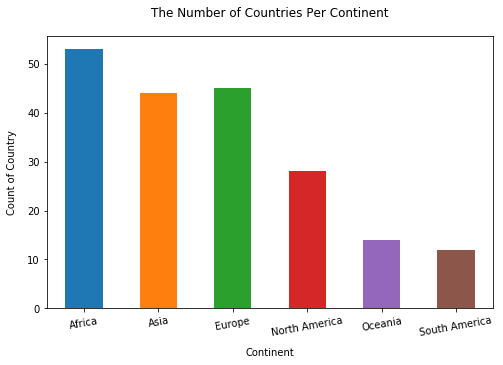

In [20]:
gdp_df.groupby('Continent').Country.nunique().plot(kind='bar',figsize=(8, 5), rot=10)
plt.xlabel("Continent", labelpad=10)
plt.ylabel("Count of Country", labelpad=10)
plt.title("The Number of Countries Per Continent", y=1.05);

### 12. How many countries are represented in this dataset? What range of years are represented?
196 countries are represented. The year range represented is 27.

In [21]:
gdp_df.Country.nunique()

196

In [22]:
print(gdp_df.Year.max()-gdp_df.Year.min())

27


In [23]:
gdp_2014=gdp_df.loc[gdp_df['Year'] == 2014]

In [24]:
gdp_2014.describe()
gdp_2014.head(5)

,Country,Year,GDP_Per_Capita,Continent
3,Afghanistan,2014,1795.735834,Asia
19,Albania,2014,10700.522802,Europe
47,Algeria,2014,13549.025150,Africa
75,Angola,2014,6813.052106,Africa
103,Antigua and Barbuda,2014,20820.551057,North America


### 15. Which country had the highest GDP per capita in 2014? Which had the lowest? Find the top 5 counties by GDP per capita in 2014.
Macao SAR, China had the highest GDP per capita in 2014. Mauritania had the lowest GDP per capita in 2014.
Top 5 countries by GDP per capita in 2014 are Macao SAR, China; Qatar; Luxembourg; Singapore; Brunei.

In [25]:
gdp_2014.sort_values('GDP_Per_Capita',ascending=False)

,Country,Year,GDP_Per_Capita,Continent
2731,"Macao SAR, China",2014,130439.187070,Asia
3779,Qatar,2014,116693.507701,Asia
2703,Luxembourg,2014,92349.186486,Europe
4082,Singapore,2014,81965.361071,Asia
655,Brunei,2014,76448.593329,Asia
2484,Kuwait,2014,72588.486007,Asia
3453,Norway,2014,63419.314779,Europe
4899,United Arab Emirates,2014,62948.677902,Asia
904,Cayman Islands,2014,62929.874528,North America
4461,Switzerland,2014,57218.027926,Europe


In [26]:
gdp_2014.loc[gdp_2014['GDP_Per_Capita'].idxmin()]

Country           Mauritania
Year                    2014
GDP_Per_Capita       377.909
Continent             Africa
Name: 2950, dtype: object

In [27]:
gdp_2014.nlargest(5,'GDP_Per_Capita') #nsmallest

,Country,Year,GDP_Per_Capita,Continent
2731,"Macao SAR, China",2014,130439.187070,Asia
3779,Qatar,2014,116693.507701,Asia
2703,Luxembourg,2014,92349.186486,Europe
4082,Singapore,2014,81965.361071,Asia
655,Brunei,2014,76448.593329,Asia


### 16 Add a column to your 2014 dataframe called 'GDP_Group'. In this column, assign each country to one of three categories: "Low" if the country's GDP Per Capita is below the 25th percentile of GDP Per Capita, "Medium" if it is between the 25th and 75th percentile, and "High" if it is above the 75th percentile. How do the continents differ in terms of numbers of countries in each group?
In the Low group, there are more Africa countries and fewer NA countries.
In the Mid group, there are more Asian countries and fewer Oceania countries.
In the High group, there are more European countries and fewer Africa countries.

In [28]:
gdp_2014['Percentile']=gdp_2014.GDP_Per_Capita.rank(pct=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
gdp_2014.head(5)

,Country,Year,GDP_Per_Capita,Continent,Percentile
3,Afghanistan,2014,1795.735834,Asia,0.098446
19,Albania,2014,10700.522802,Europe,0.461140
47,Algeria,2014,13549.025150,Africa,0.549223
75,Angola,2014,6813.052106,Africa,0.352332
103,Antigua and Barbuda,2014,20820.551057,North America,0.683938


In [30]:
gdp_2014.loc[gdp_2014.Percentile <= 0.25, 'GDP_Group'] = 'Low' 
gdp_2014.loc[(gdp_2014.Percentile < 0.75)&(gdp_2014.Percentile > 0.25), 'GDP_Group'] = 'Medium' 
gdp_2014.loc[gdp_2014.Percentile >= 0.75, 'GDP_Group'] = 'High' 


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


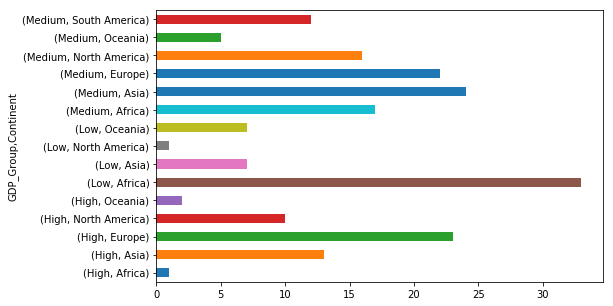

In [31]:
gdp_2014.groupby(['GDP_Group','Continent']).Country.nunique().plot(kind='barh',figsize=(8, 5), rot=0);

### 17 Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). What can you say about the distribution of GDP per capita figures in 2014?
- Right skew. 

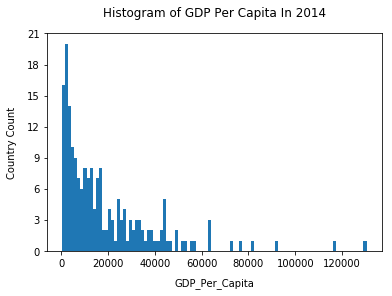

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.hist(gdp_2014.GDP_Per_Capita, bins=100)
plt.ylabel('Country Count',labelpad=10)
plt.xlabel("GDP_Per_Capita", labelpad=10)
plt.title("Histogram of GDP Per Capita In 2014", y=1.05);

### 18 Using the scipy function, find the skewness of the GDP per Capita values for 2014. You may not be familiar with this particular statistic, so if you're not, do a little research. Does the value you got make sense considering the histogram you plotted above?
Yes, this value makes sense considering the histogram plotted above.

In [33]:
from scipy.stats import skew
print("The above distribution's skew level is at " + str(skew(gdp_2014.GDP_Per_Capita)))

The above distribution's skew level is at 2.226222580604096


### 19 Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?
I notice some outliers in the Asia group. Also, Europe has the highest medium and Africa has the lowest medium.

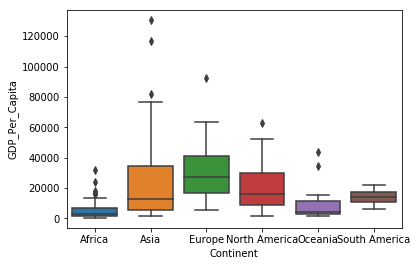

In [34]:
GDP_per_capita_boxplots=sns.boxplot(x='Continent', y='GDP_Per_Capita', data=gdp_2014)

### 20. Pivot the data (using the pandas .pivot() method) so that we can calculate % change in GDP Per Capita from 1990 to 2017 - drop any countries that are missing GDP numbers for at least one of these two years.

In [35]:
gdp_df.head(5)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [36]:
gdp_df_by_year=gdp_df.pivot(index='Country',columns='Year',values='GDP_Per_Capita')

In [37]:
gdp_df_by_year_1990_2017=gdp_df_by_year.loc[:,[1990,2017]]

In [38]:
gdp_df_by_year_1990_2017.head()

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247662,11803.283883
Algeria,10297.842349,13876.294642
Angola,4761.229638,6044.972035
Antigua and Barbuda,17472.946483,22855.748017


In [39]:
gdp_df_by_year_1990_2017_nonull=gdp_df_by_year_1990_2017.dropna()

In [40]:
gdp_df_by_year_1990_2017_nonull['PC']=round((gdp_df_by_year_1990_2017_nonull[2017]-gdp_df_by_year_1990_2017_nonull[1990])/gdp_df_by_year_1990_2017_nonull[1990]*100,ndigits=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
gdp_df_by_year_1990_2017_nonull.head(5)

Year,1990,2017,PC
Country,,,
Albania,4458.247662,11803.283883,164.8
Algeria,10297.842349,13876.294642,34.7
Angola,4761.229638,6044.972035,27.0
Antigua and Barbuda,17472.946483,22855.748017,30.8
Argentina,11372.823108,18945.144022,66.6


In [42]:
gdp_df_by_year_1990_2017_nonull=gdp_df_by_year_1990_2017_nonull.reset_index()

### 21 What percentage of countries or areas experienced a positive % change in GDP per capita? What percentage experienced a negative % change?

89.0 percentage of countries or areas experienced a positive % change in GDP per capita; 
11.0 percentage of countries or areas experienced a positive % change in GDP per capita

In [43]:
total_country_count = gdp_df_by_year_1990_2017_nonull['Country'].count()

In [44]:
positive_pc_count=gdp_df_by_year_1990_2017_nonull[gdp_df_by_year_1990_2017_nonull.PC>=0]['Country'].count() 

In [45]:
negative_pc_count=gdp_df_by_year_1990_2017_nonull[gdp_df_by_year_1990_2017_nonull.PC<0]['Country'].count() 

In [46]:
positive_pc=round(positive_pc_count/total_country_count*100,ndigits=1)

In [47]:
negative_pc=round(negative_pc_count/total_country_count*100,ndigits=1)

In [48]:
print(str(positive_pc)+' percentage of countries or areas experienced a positive % change in GDP per capita')

89.0 percentage of countries or areas experienced a positive % change in GDP per capita


In [49]:
print(str(negative_pc)+' percentage of countries or areas experienced a positive % change in GDP per capita')

11.0 percentage of countries or areas experienced a positive % change in GDP per capita


### 22.Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita from 1990 to 2017.
Equatorial Guinea had the highest % change in GDP per capita.	

In [50]:
gdp_df_by_year_1990_2017_nonull.nlargest(1, 'PC')

Year,Country,1990,2017,PC
45,Equatorial Guinea,1017.764136,22298.942144,2091.0


In [51]:
Equatorial_Guinea=gdp_df[gdp_df.Country == "Equatorial Guinea"]

In [52]:
Equatorial_Guinea.head()

,Country,Year,GDP_Per_Capita,Continent
1439,Equatorial Guinea,2017,22298.942144,Africa
1440,Equatorial Guinea,2016,24296.603580,Africa
1441,Equatorial Guinea,2015,27708.638182,Africa
1442,Equatorial Guinea,2014,31743.410748,Africa
1443,Equatorial Guinea,2013,32959.108100,Africa


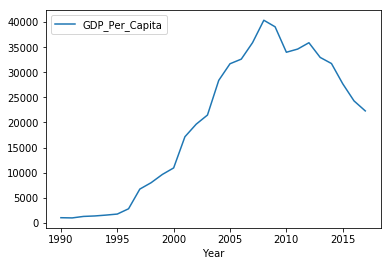

In [53]:
lines = Equatorial_Guinea.plot.line(x='Year',y='GDP_Per_Capita')

### 23. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Equatorial Guinea had an increase from 1990 to 2008 and then dropped since then.
China had an increase in GDP Per Capita throughtout the period, and in recent years, the increasing rate has been higher. 

In [54]:
gdp_df_by_year_1990_2017_nonull.nlargest(2, 'PC')

Year,Country,1990,2017,PC
45,Equatorial Guinea,1017.764136,22298.942144,2091.0
31,China,1521.963868,15253.993071,902.3


In [55]:
China=gdp_df[gdp_df.Country == "China"] 

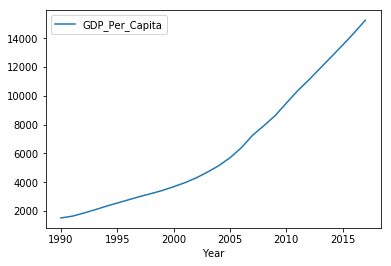

In [56]:
lines = China.plot.line(x='Year',y='GDP_Per_Capita')

### 24 Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [57]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4495)

In [58]:
del internet_df['Value Footnotes']

In [59]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


### 25. How many rows and columns does this new dataset have? What are the types of its columns?

In [60]:
internet_df.shape

(4495, 3)

In [61]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
Country or Area    4495 non-null object
Year               4495 non-null int64
Value              4495 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.4+ KB


### 26. Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [62]:
internet_df.columns=['Country','Year','Internet_Users_Pct']

In [63]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


### 27. Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

In [64]:
gdp_and_internet_use=pd.merge(gdp_df,internet_df,how='inner',on=['Country','Year'])

### 28. Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

In [65]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [66]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3528,Zimbabwe,1997,3036.422224,Africa,0.033080
3529,Zimbabwe,1996,2985.856605,Africa,0.016790
3530,Zimbabwe,1995,2736.486436,Africa,0.007684
3531,Zimbabwe,1994,2768.309953,Africa,0.001739
3532,Zimbabwe,1990,2819.549467,Africa,0.000000


### 29. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. 
### What is the mean internet users percentage in 2014? 
44.6%
### How many countries have at least 90% internet users in 2014?
12 countries have at least 90% internet users in 2014

In [67]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

In [68]:
print(str(round(gdp_and_internet_use_2014['Internet_Users_Pct'].mean(),1))+"%")

44.6%


In [69]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.522802,Europe,60.10
34,Algeria,2014,13549.025150,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20820.551057,North America,64.00


In [70]:
#df[df['col1']=='apple']
print(str(gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']>=90].Country.count())+' countries have at least 90% internet users in 2014')

12 countries have at least 90% internet users in 2014


### 30. Find the countries that had the top 5 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. What trends do you notice?

I noticed an increasing trend in each of the five plots.

In [71]:
gdp_and_internet_use_2014_top5=gdp_and_internet_use_2014.nlargest(5, 'GDP_Per_Capita')

In [72]:
list(gdp_and_internet_use_2014_top5.Country)

['Qatar', 'Luxembourg', 'Singapore', 'Kuwait', 'Norway']

In [73]:
gdp_and_internet_use_top5 = gdp_and_internet_use[gdp_and_internet_use.Country.isin(list(gdp_and_internet_use_2014_top5.Country))]

In [74]:
gdp_and_internet_use_top5.head(5)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1685,Kuwait,2014,72588.486007,Asia,78.700000
1686,Kuwait,2013,75597.292936,Asia,75.460000
1687,Kuwait,2012,78700.458568,Asia,70.450000
1688,Kuwait,2011,78021.671676,Asia,65.769071
1689,Kuwait,2010,75359.963489,Asia,61.400000


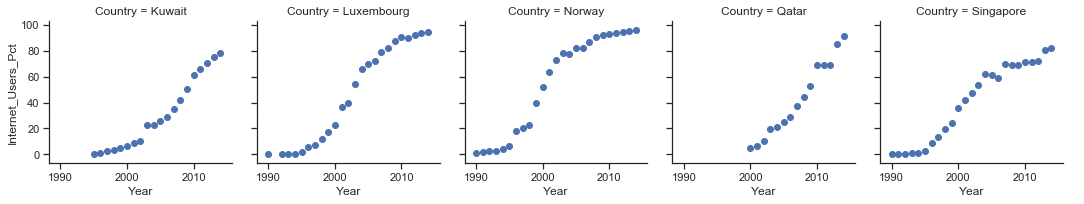

In [75]:
#df.loc[df.col=='Kuwait',:]

sns.set(style="ticks")

g = sns.FacetGrid(gdp_and_internet_use_top5, col='Country')
g.map(plt.scatter, "Year", "Internet_Users_Pct", alpha=1)
g.add_legend();


### 31. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


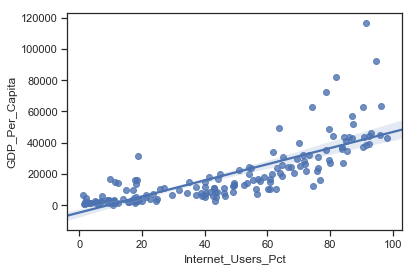

In [76]:
sns.regplot(x=gdp_and_internet_use_2014["Internet_Users_Pct"], y=gdp_and_internet_use_2014["GDP_Per_Capita"]);


### 32. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?
The correlation is 0.789. This means that there is a strong uphill (positive) linear relationship between GDP per Capita and Internet Use for the year 2014.

In [77]:
gdp_and_internet_use_2014["GDP_Per_Capita"].corr(gdp_and_internet_use_2014["Internet_Users_Pct"])

0.7889328658954466

### 33. Using the statsmodels library, create an ordinary linear regression model with independent variable GDP per capita and dependent variable internet users percentage for the year 2014. Be sure to include an intercept term. Print the model summary. What R^2 value do you get for this model? What is the meaning of this number?

R squared value is 0.622. This means that 62.2% of the variation in GDP Per Capita can be explained by this model. 

In [78]:
X = sm.add_constant(gdp_and_internet_use_2014["Internet_Users_Pct"])

model = sm.OLS(gdp_and_internet_use_2014["GDP_Per_Capita"],X )
ols_result = model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_Per_Capita   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     268.7
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           2.65e-36
Time:                        18:23:04   Log-Likelihood:                -1780.0
No. Observations:                 165   AIC:                             3564.
Df Residuals:                     163   BIC:                             3570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4612.8248   1673

### 34. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. Run an ordinary linear regression with response variable internet users and explanatory variable the log of the GDP per capita, and view the model summary. What is the meaning of the coefficients you get? Which of the two models that you created appears to do a better job?
The correlation coefficient means that by increasing 1 unit of the Internet_Users_Pct,the GDP per capita will be increasing 0.0355 on average.The second model appreas to do a better job because it has a higher R squared.  



In [79]:
gdp_and_internet_use_2014['Log_GDP_Per_Capita'] = gdp_and_internet_use_2014['GDP_Per_Capita'].apply(np.log)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
gdp_and_internet_use_2014["Log_GDP_Per_Capita"].corr(gdp_and_internet_use_2014["Internet_Users_Pct"])

0.8783135252545076

In [81]:
X = sm.add_constant(gdp_and_internet_use_2014["Internet_Users_Pct"])

model = sm.OLS(gdp_and_internet_use_2014["Log_GDP_Per_Capita"],X )
ols_result = model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:     Log_GDP_Per_Capita   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     550.1
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           4.07e-54
Time:                        18:23:04   Log-Likelihood:                -139.74
No. Observations:                 165   AIC:                             283.5
Df Residuals:                     163   BIC:                             289.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.6574      0

### 35. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

I think this is useful. There is a strong assiciation between internet use and gdp per capita in the US.

In [82]:
gdp_and_internet_use_US=gdp_and_internet_use[gdp_and_internet_use['Country']=='United States']

In [83]:
gdp_and_internet_use_US["GDP_Per_Capita"].corr(gdp_and_internet_use_US["Internet_Users_Pct"])

0.991618022957524

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


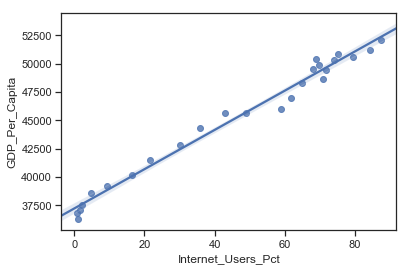

In [84]:
sns.regplot(x=gdp_and_internet_use_US["Internet_Users_Pct"], y=gdp_and_internet_use_US["GDP_Per_Capita"])


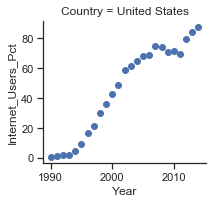

In [85]:
sns.set(style="ticks")

g = sns.FacetGrid(gdp_and_internet_use.loc[gdp_and_internet_use.Country=='United States',:], col='Country')
g.map(plt.scatter, "Year", "Internet_Users_Pct", alpha=1)
g.add_legend();

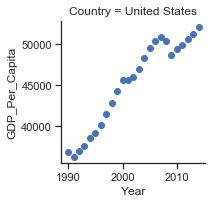

In [86]:
sns.set(style="ticks")

g = sns.FacetGrid(gdp_and_internet_use.loc[gdp_and_internet_use.Country=='United States',:], col='Country')
g.map(plt.scatter, "Year", "GDP_Per_Capita", alpha=1)
g.add_legend();

# Solo Exploration and Presentation:

### Choose and download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
I chose a dataset contains all CPI and CPI % Chg by country. I saved it at the folder where other data files are stored. I renamed it as `cpi.csv`.

## Section One: Data Prep

### Step 1: New Data Set (CPI) Overview

In [220]:
cpi = pd.read_csv('../data/cpi.csv')

In [221]:
cpi.head(5)

,OID,Country or Area,Year,Description,Magnitude,Value
0,11064..XZF...,ADVANCED ECONOMIES,2009,CPI % CHANGE,PERCENT PER ANNU,-0.098047
1,11064...ZF...,ADVANCED ECONOMIES,2009,CPI,INDEX NUMBER,108.057000
2,11064..XZF...,ADVANCED ECONOMIES,2008,CPI % CHANGE,PERCENT PER ANNU,3.350780
3,11064...ZF...,ADVANCED ECONOMIES,2008,CPI,INDEX NUMBER,108.163000
4,11064..XZF...,ADVANCED ECONOMIES,2007,CPI % CHANGE,PERCENT PER ANNU,2.264320


In [222]:
cpi.tail(5)

,OID,Country or Area,Year,Description,Magnitude,Value
15490,69864..XZF...,ZIMBABWE,1966,CPI % CHANGE,PERCENT PER ANNU,3.121950
15491,69864.A.ZF...,ZIMBABWE,1966,CONSUMER PRICE INDEX,INDEX NUMBER,0.000002
15492,69864..XZF...,ZIMBABWE,1965,CPI % CHANGE,PERCENT PER ANNU,2.500000
15493,69864.A.ZF...,ZIMBABWE,1965,CONSUMER PRICE INDEX,INDEX NUMBER,0.000002
15494,69864.A.ZF...,ZIMBABWE,1964,CONSUMER PRICE INDEX,INDEX NUMBER,0.000002


## Section One: Data Prep

### Step 2: New Data Set (CPI) Column Renaming

In [224]:
cpi.columns = [x.replace(' ', '_') for x in cpi.columns]
cpi.columns

Index(['OID', 'Country_or_Area', 'Year', 'Description', 'Magnitude', 'Value'], dtype='object')

In [225]:
cpi.columns = ['OID', 'Country','Year', 'Description', 'Magnitude', 'CPI_Value']

## Section One: Data Prep

### Step 3: New Data Set (CPI) Subsetting

In [266]:
cpi.groupby('Description').count().reset_index().sort_values(by='OID',ascending=False)

,Description,OID,Country,Year,Magnitude,CPI_Value
17,CPI % CHANGE,7482,7482,7482,7456,7482
8,CONSUMER PRICES,587,587,587,568,587
2,CONSUMER PRICE INDEX,559,559,559,548,559
15,CPI,535,535,535,535,535
119,HARMONIZED CPI,197,197,197,197,197
57,CPI: ALL ITEMS,173,173,173,173,173
37,CPI NATIONAL,168,168,168,167,168
121,HARMONIZED CPI 2005=100,143,143,143,143,143
113,CPI:URBAN AREAS,124,124,124,124,124
77,CPI:ALL COUNTRY,119,119,119,119,119


In [226]:
cpi_abs = cpi[cpi.Description.isin(["CONSUMER PRICE INDEX","CPI","CONSUMER PRICES"] )]

In [267]:
cpi_abs_pivot = cpi_abs.groupby('Country').count().sort_values(by='OID',ascending=False)

In [264]:
cpi_abs_pivot.head(5)

,OID,Year,Description,Magnitude,CPI_Value
Country,,,,,
ARGENTINA,62,62,62,62,62
BOLIVIA,62,62,62,62,62
ICELAND,61,61,61,61,61
JAMAICA,57,57,57,57,57
SINGAPORE,50,50,50,50,50


In [229]:
cpi_abs_sin = cpi_abs[cpi_abs.Country == 'SINGAPORE']

In [230]:
cpi_abs_sin= cpi_abs_sin.reset_index()

In [231]:
del cpi_abs_sin['OID']
del cpi_abs_sin['index']

In [232]:
cpi_abs_sin.head(5)

,Country,Year,Description,Magnitude,CPI_Value
0,SINGAPORE,2009,CPI,INDEX NUMBER,110.060
1,SINGAPORE,2008,CPI,INDEX NUMBER,109.861
2,SINGAPORE,2007,CPI,INDEX NUMBER,103.137
3,SINGAPORE,2006,CPI,INDEX NUMBER,101.021
4,SINGAPORE,2005,CPI,INDEX NUMBER,100.000


In [262]:
cpi_abs_sin = cpi_abs_sin.replace({"SINGAPORE": "Singapore"})

## Section One: Data Prep

### Step 4: New Data Set (CPI) and Existing Data Set (GDP Per Capita) Combining

In [234]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [235]:
cpi_abs_sin.head(5)

,Country,Year,Description,Magnitude,CPI_Value
0,Singapore,2009,CPI,INDEX NUMBER,110.060
1,Singapore,2008,CPI,INDEX NUMBER,109.861
2,Singapore,2007,CPI,INDEX NUMBER,103.137
3,Singapore,2006,CPI,INDEX NUMBER,101.021
4,Singapore,2005,CPI,INDEX NUMBER,100.000


In [236]:
gdp_cpi_gdp_sin = pd.merge(gdp_and_internet_use, cpi_abs_sin, on=['Country','Year'], how='inner')

## Section One: Data Prep

### Step 5: Calculating A New Value "GDP Deflator" in the New Data Set (CPI) 
`Gdp Deflator = Nominal GDP / Real GDP * 100`

In [237]:
gdp_cpi_gdp_sin.loc[gdp_cpi_gdp_sin.CPI_Value==100]

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Description,Magnitude,CPI_Value
4,Singapore,2005,62638.95285,Asia,61.0,CPI,INDEX NUMBER,100.0


In [238]:
gdp_per_cap_deflator_base_value = gdp_cpi_gdp_sin.loc[gdp_cpi_gdp_sin.CPI_Value==100].GDP_Per_Capita

In [239]:
gdp_cpi_gdp_sin['gdp_per_cap_deflator']= gdp_cpi_gdp_sin['GDP_Per_Capita']/list(gdp_per_cap_deflator_base_value)*100

In [240]:
gdp_cpi_gdp_sin.head(8)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Description,Magnitude,CPI_Value,gdp_per_cap_deflator
0,Singapore,2009,64934.799310,Asia,69.000000,CPI,INDEX NUMBER,110.0600,103.665206
1,Singapore,2008,66842.150128,Asia,69.000000,CPI,INDEX NUMBER,109.8610,106.710197
2,Singapore,2007,69202.658933,Asia,69.900000,CPI,INDEX NUMBER,103.1370,110.478633
3,Singapore,2006,66176.057906,Asia,59.000000,CPI,INDEX NUMBER,101.0210,105.646814
4,Singapore,2005,62638.952850,Asia,61.000000,CPI,INDEX NUMBER,100.0000,100.000000
5,Singapore,2004,59732.958543,Asia,62.000000,CPI,INDEX NUMBER,99.5767,95.360723
6,Singapore,2003,55077.150387,Asia,53.837943,CPI,INDEX NUMBER,97.9481,87.927955
7,Singapore,2002,51916.161202,Asia,47.000000,CPI,INDEX NUMBER,97.4531,82.881592


In [243]:
gdp_cpi_gdp_sin=gdp_cpi_gdp_sin.sort_values(by='Year',ascending=True)

## Section Two: Data Sanity check

In [265]:
gdp_cpi_gdp_sin_var = gdp_cpi_gdp_sin[['gdp_per_cap_deflator','CPI_Value']]

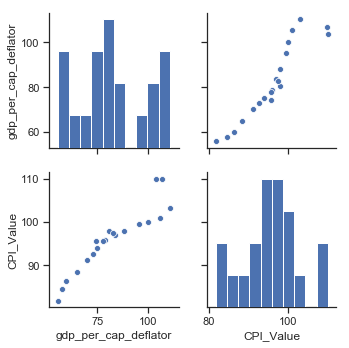

In [245]:
sns.pairplot(gdp_cpi_gdp_sin_var);

## Section Three: Results

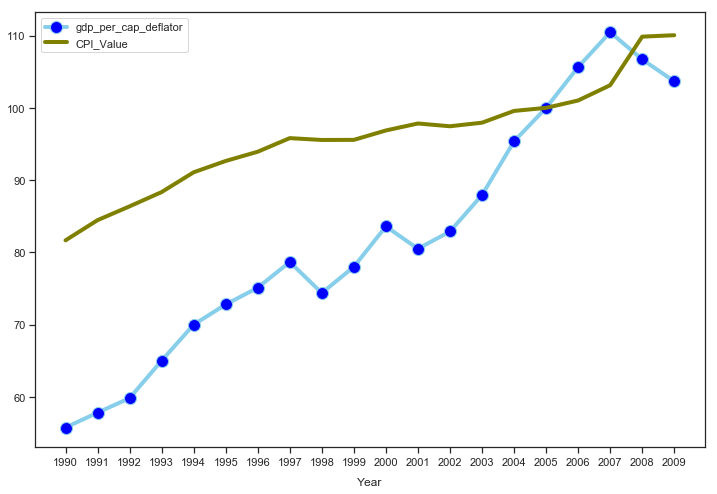

In [260]:
gdp_cpi_gdp_sin['Year'] = gdp_cpi_gdp_sin['Year'].astype(str)

plt.figure(figsize=(12,8))

plt.plot( 'Year', 'gdp_per_cap_deflator', data=gdp_cpi_gdp_sin, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Year', 'CPI_Value', data=gdp_cpi_gdp_sin, marker='', color='olive', linewidth=4)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.xlabel("Year", labelpad=10)
plt.legend();

## Section Four: Implication - What does it mean when CPI outpaces GDP Deflator?

A Consumer Price Index measures changes in the price level of a weighted average market basket of consumer goods and services purchased by households. In other words, CPI measures the cost of living (Chen, 2019).

GDP per capita is a measure of a country's economic output that accounts for its number of people. It divides the country's gross domestic product by its total population (Chapplelow, 2019).

GDP deflator is a measure of price inflation/deflation with respect to a specific base year; the GDP deflator of the base year itself is equal to 100 (Wikipedia, n.d.)

* Declines in the Gross Domestic Product (GDP) and productivity often indicate an ailing economy.
* Rising prices (CPI) and rising unemployment are two of the data points used in attempts to determine whether stagflation is threatening the economy (Smith, 2018). 

In 2009, Singapore saw a decline in GDP Per Capita and an increase in CPI. These signals indicate economic stagflation, as evidenced by the Great Recession.

### Reference: 

Chapplelow, J. (2019). Investopedia. Retrieved 20 September, 2019, from https://www.investopedia.com/terms/p/per-capita-gdp.asp

Chen, J. (2019). Investopedia. Retrieved 20 September, 2019, from https://www.investopedia.com/terms/c/consumerpriceindex

Smith, L. (2018). Investopedia. Retrieved 19 September, 2019, from https://www.investopedia.com/articles/economics/08/stagflation

Wikipedia (n.d.). Wikipedia. Retrieved 20 September, 2019, from https://en.wikipedia.org/wiki/GDP_deflator

